In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive, unzip the file containing the train and test data
drive.mount('/content/drive')

zip_file_path = "/content/drive/My Drive/ATU/archive.zip"

extraction_path = "/content/extracted"

os.makedirs(extraction_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


Mounted at /content/drive


In [ ]:
#in the training data get the name of each category by reading the folder names and print out the number of images in each category
dataset_path = '/content/extracted/archive/Train'
categories = os.listdir(dataset_path)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_path))
    print(f"Category: {category}, Number of Images: {num_images}")


Category: 16, Number of Images: 420
Category: 14, Number of Images: 780
Category: 11, Number of Images: 1320
Category: 13, Number of Images: 2160
Category: 18, Number of Images: 1200
Category: 15, Number of Images: 630
Category: 10, Number of Images: 2010
Category: 17, Number of Images: 1110
Category: 19, Number of Images: 210
Category: 12, Number of Images: 2100


In [ ]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/extracted/archive/Train'
categories = os.listdir(dataset_path)

# Create an ImageDataGenerator with enhanced data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,         # Degree range for random rotations
    width_shift_range=0.25,     # Fraction of total width for random horizontal shifts
    height_shift_range=0.25,    # Fraction of total height for random vertical shifts
    shear_range=0.2,           # Shear intensity
    zoom_range=0.2,            # Range for random zoom
    horizontal_flip=True,      # Randomly flip inputs horizontally
    fill_mode='nearest'        # Strategy for filling in newly created pixels
)

# create a new path to store the balanced dataset to be used
balanced_dataset_path_new = '/content/balanced_dataset_new'
os.makedirs(balanced_dataset_path_new, exist_ok=True)

# number of images in each category in the balanced dataset. 420 was chosen as there is 210 images in category 19 and each image has an augmented version so the max is 420 in that category
desired_images_per_category = 420

# Resize and normalize images to comply with VGG input size
target_size = (224, 224)

for category in categories:
    category_path = os.path.join(dataset_path, category)
    category_balanced_path_new = os.path.join(balanced_dataset_path_new, category)
    os.makedirs(category_balanced_path_new, exist_ok=True)

    # Counter for each category
    category_images = len(os.listdir(category_path))

    # Generate additional images through data augmentation if needed
    if category_images < desired_images_per_category:
        print(f"Generating additional images for Category {category}...")
        while category_images < desired_images_per_category:
            for img_file in os.listdir(category_path):
                if category_images >= desired_images_per_category:
                    break  # Stop if desired number of images for the category is reached

                img_path = os.path.join(category_path, img_file)
                img = Image.open(img_path)

                # Convert Image to array
                img_array = img_to_array(img) / 255.0

                # Apply data augmentation to the array
                augmented_img_array = datagen.random_transform(img_array)

                # Convert array back to Image
                augmented_img = Image.fromarray((augmented_img_array * 255).astype('uint8'))

                # Resize augmented image
                augmented_img = augmented_img.resize(target_size)

                # Save the processed image to the new balanced dataset
                augmented_img.save(os.path.join(category_balanced_path_new, f'aug_{img_file}'))

                # Increment the counters
                category_images += 1

    # Use the current images if category already has enough or more images
    if category_images >= desired_images_per_category:
        print(f"Category {category} has enough or more images. Copying existing images...")
        existing_images = os.listdir(category_path)[:desired_images_per_category]

        for img_file in existing_images:
            img_path = os.path.join(category_path, img_file)
            img = Image.open(img_path)

            # Resize image
            img = img.resize(target_size)

            # Save the processed image to the new balanced dataset
            img.save(os.path.join(category_balanced_path_new, img_file))

    # Print the number of images in the new balanced dataset for the current category
    print(f"Category: {category}, New Balanced Images: {len(os.listdir(category_balanced_path_new))}")

# Print a message indicating that the balancing process is complete for the new dataset
print("New Balancing process completed.")




Category 16 has enough or more images. Copying existing images...
Category: 16, New Balanced Images: 420
Category 14 has enough or more images. Copying existing images...
Category: 14, New Balanced Images: 420
Category 11 has enough or more images. Copying existing images...
Category: 11, New Balanced Images: 420
Category 13 has enough or more images. Copying existing images...
Category: 13, New Balanced Images: 420
Category 18 has enough or more images. Copying existing images...
Category: 18, New Balanced Images: 420
Category 15 has enough or more images. Copying existing images...
Category: 15, New Balanced Images: 420
Category 10 has enough or more images. Copying existing images...
Category: 10, New Balanced Images: 420
Category 17 has enough or more images. Copying existing images...
Category: 17, New Balanced Images: 420
Generating additional images for Category 19...
Category 19 has enough or more images. Copying existing images...
Category: 19, New Balanced Images: 420
Categor

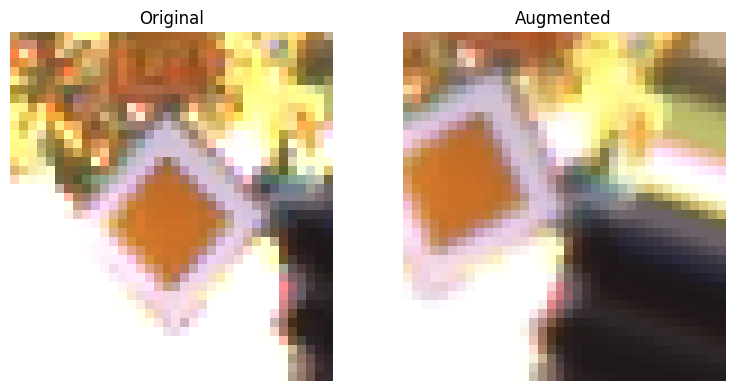

Images saved successfully.


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Select one original image
sample_image = os.path.join(category_path, os.listdir(category_path)[1000])

# Create a subplot for the image and its augmented version
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

img = Image.open(sample_image)
img_array = img_to_array(img) / 255.0

# Display the original image
axs[0].imshow(img)
axs[0].set_title('Original')
axs[0].axis('off')

# Apply data augmentation to the array
augmented_img_array = datagen.random_transform(img_array)
augmented_img = Image.fromarray((augmented_img_array * 255).astype('uint8'))

# Display the augmented image
axs[1].imshow(augmented_img)
axs[1].set_title('Augmented')
axs[1].axis('off')

# Save the original image
original_save_path = '/content/drive/My Drive/ATU/original_image.jpg'
img.save(original_save_path)

# Save the augmented image
augmented_save_path = '/content/drive/My Drive/ATU/augmented_image.jpg'
augmented_img.save(augmented_save_path)

plt.tight_layout()

# Save the entire figure if needed
figure_save_path = '/content/drive/My Drive/ATU/original_augmented_figure.jpg'
plt.savefig(figure_save_path)

plt.show()

print("Images saved successfully.")



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% training, 20% validation


train_generator = datagen.flow_from_directory(
    balanced_dataset_path_new,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    balanced_dataset_path_new,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 3360 images belonging to 10 classes.
Found 840 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

num_classes = 10
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

model.fit(train_generator, validation_data=validation_generator, epochs=10)

model.save('/content/drive/My Drive/ATU/traffic_sign_classifier.h5')

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

num_classes = 10

# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification head
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
predictions = layers.Dense(num_classes, activation='softmax')(x)

# Combine the base model with your custom head
model = models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the updated model summary
model.summary()

#unfreeze the last 5 layers of the model
for layer in model.layers[-5:]:
  layer.trainable = True

# Train the model with fine-tuning
model.fit(train_generator, validation_data=validation_generator, epochs=10)

# Save the fine-tuned model with a different filename
model.save('/content/drive/My Drive/ATU/fine_tuned_traffic_sign_classifier.h5')


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.models import load_model

# Load the original model
original_model_path = '/content/drive/My Drive/ATU/traffic_sign_classifier.h5'
original_model = load_model(original_model_path)

# Load the fine-tuned model
fine_tuned_model_path = '/content/drive/My Drive/ATU/fine_tuned_traffic_sign_classifier.h5'
fine_tuned_model = load_model(fine_tuned_model_path)


Training accuracy plot saved at: /content/drive/My Drive/ATU/training_accuracy_plot.png
Training loss plot saved at: /content/drive/My Drive/ATU/training_loss_plot.png


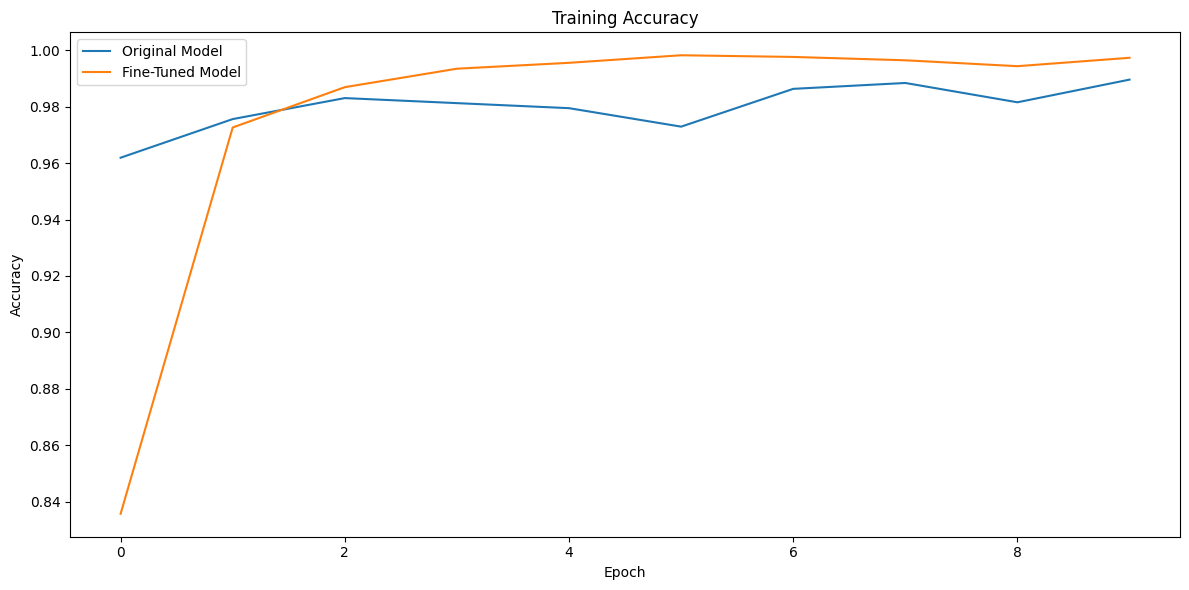

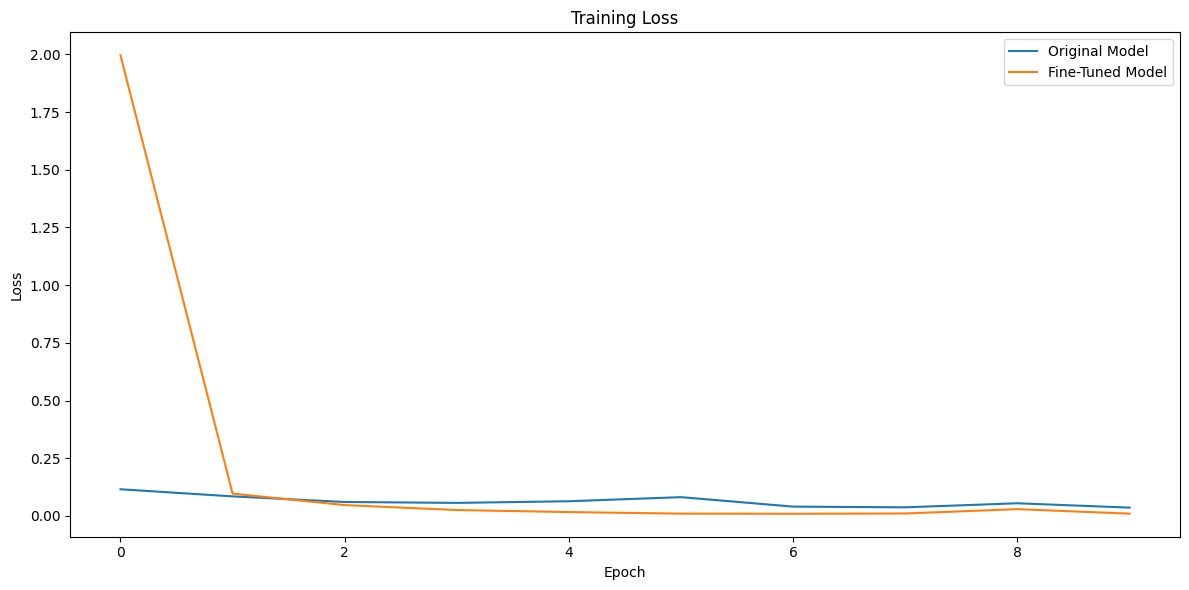

In [ ]:
save_path_accuracy = '/content/drive/My Drive/ATU/training_accuracy_plot.png'
save_path_loss = '/content/drive/My Drive/ATU/training_loss_plot.png'

# Plot Training Accuracy
plt.figure(figsize=(12, 6))
plt.plot(original_model_history.history['accuracy'], label='Original Model')
plt.plot(fine_tuned_model_history.history['accuracy'], label='Fine-Tuned Model')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(save_path_accuracy)
print(f'Training accuracy plot saved at: {save_path_accuracy}')

# Plot Training Loss
plt.figure(figsize=(12, 6))
plt.plot(original_model_history.history['loss'], label='Original Model')
plt.plot(fine_tuned_model_history.history['loss'], label='Fine-Tuned Model')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig(save_path_loss)
print(f'Training loss plot saved at: {save_path_loss}')



In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

csv_path = '/content/extracted/archive/Test.csv'
test_df = pd.read_csv(csv_path)

# Convert ClassId column to string
test_df['ClassId'] = test_df['ClassId'].astype(str)

# Filter DataFrame to include only ClassId 10-19
filtered_test_df = test_df[test_df['ClassId'].between('10', '19')]

# Now, create generators with class labels from the filtered DataFrame for both models
original_test_generator = datagen.flow_from_dataframe(
    filtered_test_df,
    directory='/content/extracted/archive/',
    x_col='Path',
    y_col='ClassId',
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

fine_tuned_test_generator = datagen.flow_from_dataframe(
    filtered_test_df,
    directory='/content/extracted/archive/',
    x_col='Path',
    y_col='ClassId',
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the original model
original_test_loss, original_test_accuracy = original_model.evaluate(original_test_generator)
print(f'Original Model - Test Accuracy: {original_test_accuracy}, Test Loss: {original_test_loss}')

# Evaluate the fine-tuned model
fine_tuned_test_loss, fine_tuned_test_accuracy = fine_tuned_model.evaluate(fine_tuned_test_generator)
print(f'Fine-Tuned Model - Test Accuracy: {fine_tuned_test_accuracy}, Test Loss: {fine_tuned_test_loss}')

# Get predictions for the original model
original_test_predictions = original_model.predict(original_test_generator)
original_test_pred_labels = np.argmax(original_test_predictions, axis=1)
original_test_true_labels = original_test_generator.classes

print("\nOriginal Model Metrics:")
print(classification_report(original_test_true_labels, original_test_pred_labels))

# Get predictions for the fine-tuned model
fine_tuned_test_predictions = fine_tuned_model.predict(fine_tuned_test_generator)
fine_tuned_test_pred_labels = np.argmax(fine_tuned_test_predictions, axis=1)
fine_tuned_test_true_labels = fine_tuned_test_generator.classes

print("\nFine-Tuned Model Metrics:")
print(classification_report(fine_tuned_test_true_labels, fine_tuned_test_pred_labels))




Found 3930 validated image filenames belonging to 10 classes.
Found 3930 validated image filenames belonging to 10 classes.
123/123 [==============================] - 18s 143ms/step - loss: 0.6962 - accuracy: 0.8145
Original Model - Test Accuracy: 0.8145037889480591, Test Loss: 0.6962264180183411
123/123 [==============================] - 17s 136ms/step - loss: 0.6663 - accuracy: 0.8038
Fine-Tuned Model - Test Accuracy: 0.8038167953491211, Test Loss: 0.6662779450416565
123/123 [==============================] - 16s 130ms/step

Original Model Metrics:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       660
           1       0.93      0.61      0.74       420
           2       0.83      0.88      0.85       690
           3       0.82      0.99      0.90       720
           4       0.99      0.77      0.87       270
           5       0.92      0.58      0.71       210
           6       0.57      0.65      0.61       150
          

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def display_and_save_prediction(original_model, fine_tuned_model, data_generator, image_index=0, save_path="/content/predictions"):
    # Generate predictions for both models on the same subset of the test set
    original_predictions = original_model.predict(data_generator, steps=len(data_generator), verbose=1)
    fine_tuned_predictions = fine_tuned_model.predict(data_generator, steps=len(data_generator), verbose=1)

    # Get the selected image and its true label
    selected_image_file = data_generator.filepaths[image_index]
    selected_true_label = data_generator.labels[image_index]

    img = image.load_img(selected_image_file, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Get predictions for both models
    original_prediction = original_predictions[image_index]
    fine_tuned_prediction = fine_tuned_predictions[image_index]

    original_predicted_class = np.argmax(original_prediction)
    fine_tuned_predicted_class = np.argmax(fine_tuned_prediction)

    original_confidence = original_prediction[original_predicted_class]
    fine_tuned_confidence = fine_tuned_prediction[fine_tuned_predicted_class]

    # Display the image and predictions for both models
    plt.figure(figsize=(12, 6))

    # Original Model Predictions
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Original Model\nTrue Label: {selected_true_label}\nPredicted Label: {original_predicted_class}\nConfidence: {original_confidence:.2f}')
    plt.axis('off')

    # Fine-Tuned Model Predictions
    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title(f'Fine-Tuned Model\nTrue Label: {selected_true_label}\nPredicted Label: {fine_tuned_predicted_class}\nConfidence: {fine_tuned_confidence:.2f}')
    plt.axis('off')

    # Save the figure
    save_file_path = f"{save_path}/prediction_{image_index}.png"
    plt.savefig(save_file_path)
    plt.close()

    print(f"Saved prediction for image {image_index} to {save_file_path}")

save_directory = '/content/drive/My Drive/ATU/predictions'
os.makedirs(save_directory, exist_ok=True)

# pick the image to be visualised
selected_image_index = 0

display_and_save_prediction(original_model, fine_tuned_model, original_test_generator, image_index=selected_image_index, save_path=save_directory)




123/123 [==============================] - 17s 136ms/step
Saved prediction for image 0 to /content/drive/My Drive/ATU/predictions/prediction_0.png


123/123 [==============================] - 16s 133ms/step


<Figure size 600x600 with 0 Axes>

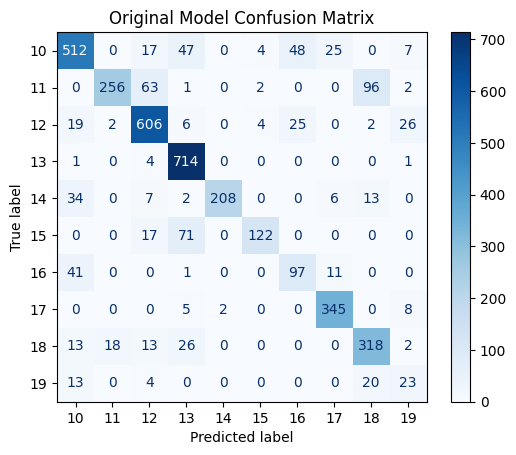

Confusion matrix saved at: /content/drive/My Drive/ATU/original_confusion_matrix.png


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the original model on the entire test set
original_test_predictions = original_model.predict(original_test_generator, steps=len(original_test_generator), verbose=1)

# Convert predictions to class labels
original_test_pred_labels = np.argmax(original_test_predictions, axis=1)

# Get true labels
original_test_true_labels = original_test_generator.classes

# Generate confusion matrix for the original model
original_conf_matrix = confusion_matrix(original_test_true_labels, original_test_pred_labels)

# Display and save the confusion matrix
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay(original_conf_matrix, display_labels=original_test_generator.class_indices).plot(cmap='Blues', values_format='d')
plt.title('Original Model Confusion Matrix')

conf_matrix_save_path = '/content/drive/My Drive/ATU/original_confusion_matrix.png'
plt.savefig(conf_matrix_save_path)

plt.show()

print(f'Confusion matrix saved at: {conf_matrix_save_path}')


123/123 [==============================] - 16s 132ms/step


<Figure size 800x600 with 0 Axes>

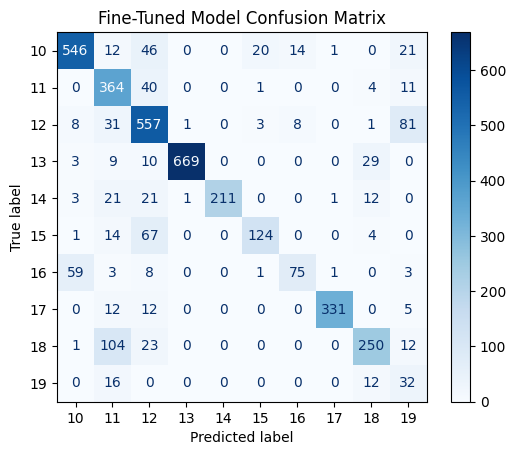

Confusion matrix saved at: /content/drive/My Drive/ATU/fine_tuned_confusion_matrix.png


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions for the fine-tuned model on the entire test set
fine_tuned_test_predictions = fine_tuned_model.predict(fine_tuned_test_generator, steps=len(fine_tuned_test_generator), verbose=1)

# Convert predictions to class labels
fine_tuned_test_pred_labels = np.argmax(fine_tuned_test_predictions, axis=1)

# Get true labels
fine_tuned_test_true_labels = fine_tuned_test_generator.classes

# Generate the confusion matrix for the fine-tuned model
fine_tuned_conf_matrix = confusion_matrix(fine_tuned_test_true_labels, fine_tuned_test_pred_labels)

# Display and save the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(fine_tuned_conf_matrix, display_labels=fine_tuned_test_generator.class_indices).plot(cmap='Blues', values_format='d')
plt.title('Fine-Tuned Model Confusion Matrix')

conf_matrix_save_path = '/content/drive/My Drive/ATU/fine_tuned_confusion_matrix.png'
plt.savefig(conf_matrix_save_path)

plt.show()

print(f'Confusion matrix saved at: {conf_matrix_save_path}')
